# Introduction to the Fourier Transform using Julia

## Initialization

In [25]:
# to install the packages used in this notebook run the following
# using Pkg
# Pkg.add(["FileIO","WAV","LibSndFile","FFTW","Plots","PlotlyJS"])

In [26]:
# load needed packages
using FileIO: load, save, loadstreaming, savestreaming
import LibSndFile
using Hose, WAV, FFTW, Plots
#, Interact

In [27]:
# enable plotlyjs backend for interactive plots
#plotlyjs()
gr()

In [28]:
# helper function
# displays an html player for a given wav file in the notebook
audioplayer(filepath) = """
    <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
    <title>Simple Test</title>
    </head>
    
    <body>
    <audio controls="controls" style="width:600px" >
      <source src="$filepath" type="audio/wav" />
      Your browser does not support the audio element.
    </audio>
    </body>
"""

# Nature of a simple wave

In [29]:
function wave(frequency,amplitude,fs,τ)
    # the semicolon (;) in Julia is not obligatory but prevents value emmision aka printing
    #= 
    frequency: cycles per second
    amplitude: multiplier to the sin
    τ:         total time duration of the wave
    fs:        samples per second
    =#
    xs = range(0, τ, length=τ*fs) .* (2pi * frequency);
    sin.(xs) .* amplitude # last value to be emmited is returned automatically
end

![Alt Text](./Sine_curve_drawing_animation.gif)

In [ ]:
#=
@manipulate for frequency = 1:10, amplitude=0:0.1:10, fs=10:1000, τ=1:10
    xs = range(0, τ, length=τ*fs);
    plot(xs, wave(frequency,amplitude,fs,τ), size=(1300,300))
end
=#

In [ ]:
frequency = 2
amplitude = 5
fs = 1000
τ = 10
w = wave(frequency,amplitude,fs,τ);

In [ ]:
plot(w)

# The Fourier Transform applied to a simple wave

In [ ]:
fft(w) .|> (x->sqrt(real(x)^2 + imag(x)^2)) |> plot

In [ ]:
fftfreq(length(w),fs) |> plot

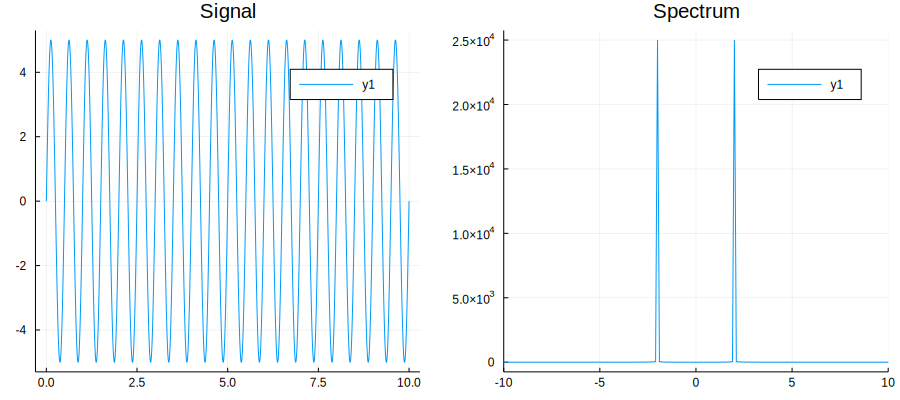

In [8]:
F = fft(w) |> fftshift
freqs = fftfreq(length(w), fs) |> fftshift

time_domain = plot(range(0,τ,length=τ*fs), w, title = "Signal")
freq_domain = plot(freqs, abs.(F), title = "Spectrum", xlim=(-10, +10)) 
plot(time_domain, freq_domain, layout = 2, size=(900,400))

In [9]:
frequency = 3
amplitude = 5
fs = 1000
τ = 10
w2 = wave(frequency,amplitude,fs,τ);

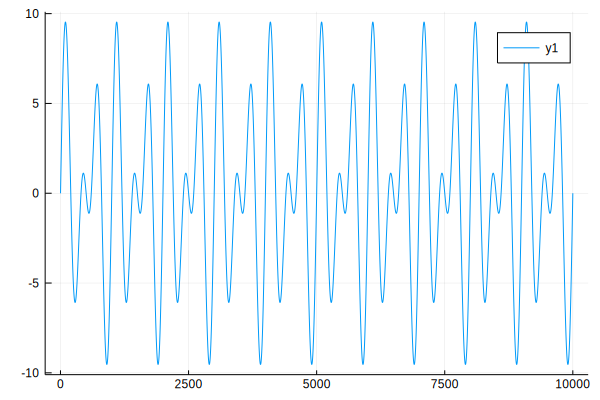

In [10]:
w3 = w .+ w2;
plot(w3)

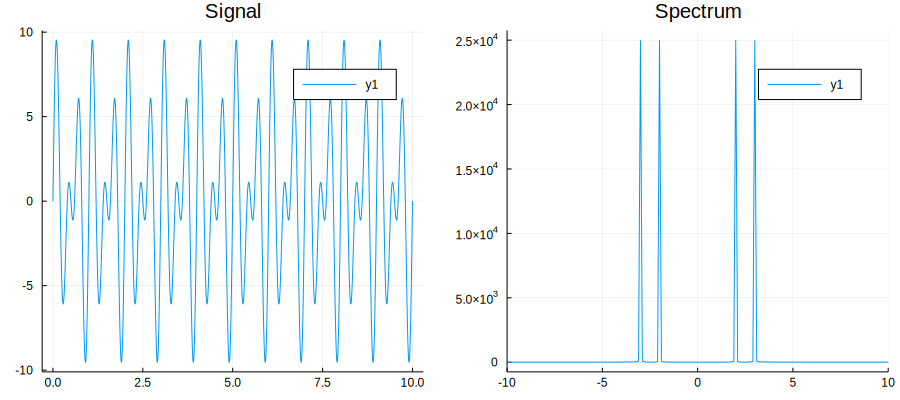

In [11]:
F = fft(w3) |> fftshift
freqs = fftfreq(length(w3), fs) |> fftshift

time_domain = plot(range(0,τ,length=τ*fs), w3, title = "Signal")
freq_domain = plot(freqs, abs.(F), title = "Spectrum", xlim=(-10, +10)) 
plot(time_domain, freq_domain, layout = 2, size=(900,400))

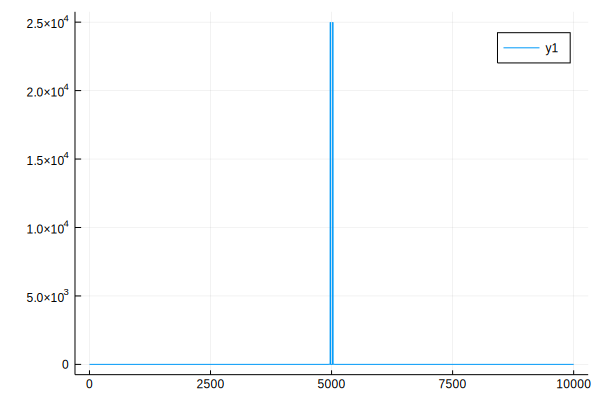

In [12]:
fft(w3) |> fftshift .|> abs |>  plot

# Mathematics of the Fourier Transform

In [ ]:
# add math

![](https://upload.wikimedia.org/wikipedia/commons/7/72/Fourier_transform_time_and_frequency_domains_%28small%29.gif)

# Real Life example of FFT

In [13]:
display("text/html", audioplayer("audio.wav"))

Simple Test 
 
 
 
 
 
 Your browser does not support the audio element.

In [14]:
y, fs, nbits, opt = wavread("/home/spiros/Documents/audio.wav");

In [15]:
size(y), fs, nbits

((196800, 1), 48000.0f0, 0x0010)

196800 points, 48K metrhseis / sec

In [16]:
nbits, typeof(nbits)

(0x0010, UInt16)

In [17]:
# calculate duration of the audio clip
size(y)[1] / fs

4.1f0

4.1 deuterolepta

In [18]:
times = collect(1:length(y)) / fs;

In [19]:
plot(times,y)

In [ ]:
yf = fft(y)

In [ ]:
fft(y) .|> (x->sqrt(real(x)^2 + imag(x)^2)) |> plot

In [ ]:
yif = ifft(y)

In [ ]:
wavwrite(yif, "./ifft_audio.wav")

In [ ]:
fft(y) .|> (x->sqrt(real(x)^2 + imag(x)^2)) |> histogram